In [39]:
import pandas as pd
import numpy as np
import math
from scipy import special
import matplotlib.pyplot as plt
import statsmodels.stats.weightstats as sm
from matplotlib import cm

In [40]:
# N_steps = 10
N_steps_orig = 1800 
N_k = 64
T_h = 18000
N_x = 21
N_y = 21

### Define input files


In [48]:
result_loc = "./../../../../Server_results/02_21_2022/"
run_name = "experiment21_02_14_48_55"

# result_loc = "./../../../../Server_results/10_12_2021_mul_q/"
# run_name = "experiment10_10_22_51_50"

# result_loc = "./../../../../Server_results/10_24_2021_less_tol/"
# run_name = "experiment23_10_01_07_23"

train_loc = "Run_no_zero_flow_no_oscilations_Run_Run_1633563563/"

# run_name = "experiment06_10_11_17_57"
# train_loc = "Run_no_zero_flow_no_oscilations_Run_Run_1633466607/"

### Load files and reshape them

In [49]:

p = np.loadtxt(f"{result_loc}{run_name}p.txt")
p = p.reshape([-1,N_k])

N_epoch = p.shape[0]

q_x = np.loadtxt(f"{result_loc}{run_name}q_x.txt")
q_x = q_x.reshape([N_epoch,N_k,-1])
q_y = np.loadtxt(f"{result_loc}{run_name}q_y.txt")
q_y = q_y.reshape([N_epoch,N_k,-1])
k_x = np.loadtxt(f"{result_loc}{run_name}k_x.txt")
k_x = k_x.reshape([N_epoch,N_k,-1])
k_y = np.loadtxt(f"{result_loc}{run_name}k_y.txt")
k_y = k_y.reshape([N_epoch,N_k,-1])
k_xy = np.loadtxt(f"{result_loc}{run_name}k_xy.txt")
k_xy = k_xy.reshape([N_epoch,N_k,-1])

lam = np.loadtxt(f"{result_loc}{run_name}lambda.txt")

N_steps = q_x.shape[2]

In [50]:
q_x.shape

(115, 64, 50)

In [51]:
def plot_cdf(p,qoi,time_step,epoch,label=''):
    P = p[epoch]
    QOI = qoi[epoch,:,time_step]

    index = np.argsort(QOI)
    plt.plot(np.ravel([QOI[index],QOI[index]],'f'),np.ravel([np.array([0,*np.cumsum(P)[:-1]]),np.cumsum(P)],'F'),label=label)

Evolution of cdf for different lambda

In [52]:
q_MC_x = np.loadtxt(f"{train_loc}Q_x_5.txt")
q_MC_y = np.loadtxt(f"{train_loc}Q_y_5.txt")


In [53]:
epoch = 121
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))
epoch = 0
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))


IndexError: index 121 is out of bounds for axis 0 with size 115

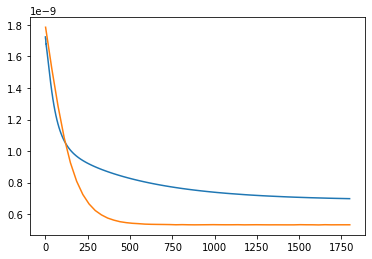

In [ ]:
epoch = 0


plt.plot(q_MC_y.mean(axis=0))
# plt.plot(q_MC_y.min(axis=0))
# plt.plot(q_MC_y.max(axis=0))

# plt.plot(q_MC_y.min(axis=0))
# plt.plot(q_MC_y.max(axis=0))
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))
# plt.plot(np.linspace(1,1800,N_steps),q_y[epoch,0:4,:].max(axis=0))
# plt.plot(np.linspace(1,1800,N_steps),q_y[epoch,0:4,:].min(axis=0))

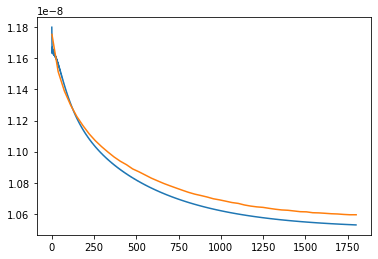

In [ ]:
epoch = 1
plt.plot(q_MC_x.mean(axis=0))
# plt.plot(q_MC_x.min(axis=0))
# plt.plot(q_MC_x.max(axis=0))

plt.plot(np.linspace(1,1800,N_steps),np.inner(q_x[epoch,:,:].T,p[epoch,:]))
# plt.plot(np.linspace(1,1800,N_steps),q_x[epoch,0:4,:].max(axis=0))
# plt.plot(np.linspace(1,1800,N_steps),q_x[epoch,0:4,:].min(axis=0))

In [ ]:
p[50,:]

array([6.25000000e-02, 6.25000000e-02, 6.25000000e-02, 6.25000000e-02,
       6.25000000e-02, 6.25000000e-02, 6.25000000e-02, 6.25000000e-02,
       6.25000000e-02, 6.25000000e-02, 6.25000000e-02, 6.25000000e-02,
       6.25000000e-02, 6.25000000e-02, 6.25000000e-02, 6.25000000e-02,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
      

In [ ]:
k_x[50,:,40]

array([6.20328695e-06, 1.55648477e-05, 1.22957050e-05, 4.54009923e-05,
       1.03041035e-05, 9.34572596e-06, 1.05506299e-05, 1.48254725e-05,
       7.55103279e-06, 1.79537892e-05, 1.22958431e-05, 1.85621512e-05,
       8.51808227e-06, 9.34607220e-06, 1.06883141e-05, 1.48257858e-05,
       1.00336943e-05, 9.95267115e-06, 1.00314310e-05, 1.00162470e-05,
       1.00460007e-05, 9.95899736e-06, 1.00442734e-05, 9.97286961e-06,
       1.00345169e-05, 9.98299282e-06, 9.97932701e-06, 1.00191487e-05,
       9.98719920e-06, 1.00332854e-05, 1.00018389e-05, 9.99599785e-06,
       1.00465927e-05, 9.98985646e-06, 9.97901285e-06, 1.00273041e-05,
       1.00002231e-05, 1.00202091e-05, 1.00372002e-05, 1.00169948e-05,
       9.99088775e-06, 9.93324608e-06, 1.00036573e-05, 9.98807067e-06,
       9.97495669e-06, 9.98726369e-06, 9.97691519e-06, 1.00385005e-05,
       9.95592482e-06, 9.99341459e-06, 1.00390899e-05, 1.00264666e-05,
       1.00181475e-05, 9.99849159e-06, 1.00027261e-05, 9.96433439e-06,
      

In [ ]:
k_xy[36,:,40]

array([-1.75084976e-08, -6.46210133e-06, -2.82399189e-08, -4.17083315e-08,
       -1.75388074e-08, -1.74727505e-08, -3.02007785e-08, -2.88596392e-08,
       -1.75267076e-08, -6.46657007e-06, -2.82338612e-08, -4.17449462e-08,
       -1.75130562e-08, -1.74547979e-08, -3.02238879e-08, -2.89013372e-08,
       -3.46453244e-07, -3.40073337e-07, -3.41617135e-07, -3.37069592e-07,
       -3.53604383e-07, -3.33309178e-07, -3.35828204e-07, -3.52164659e-07,
       -3.48400639e-07, -3.46446736e-07, -3.32716215e-07, -3.45228684e-07,
       -3.44396596e-07, -3.31197460e-07, -3.59696836e-07, -3.46508423e-07,
       -3.48198517e-07, -3.43511719e-07, -3.46358547e-07, -3.54808734e-07,
       -3.59250372e-07, -3.50034687e-07, -3.27688190e-07, -3.29659796e-07,
       -3.45211977e-07, -3.33349614e-07, -3.32810936e-07, -3.40342038e-07,
       -3.48366198e-07, -3.48735024e-07, -3.31564211e-07, -3.48194554e-07,
       -3.32215718e-07, -3.49214452e-07, -3.58660904e-07, -3.31187455e-07,
       -3.60941955e-07, -

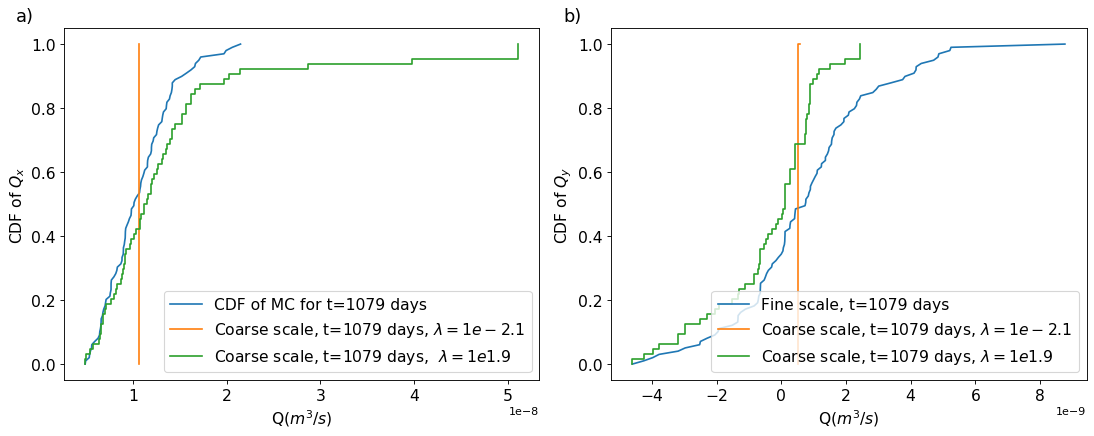

In [54]:
epoch_1 = 20
epoch_2 = 100

time_step = 30


my_dpi = 80
fig, axs = plt.subplots(1, 2, figsize=(1100/my_dpi, 400/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)
ax1 = plt.subplot(121)
ax1.text(-0.1, 1.02, 'a)', transform=ax1.transAxes,size=16)

ii = N_steps_orig//(N_steps-1) * (time_step) -1

Q_MC = q_MC_x[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100),label=rf'CDF of MC for t={ii} days')
plot_cdf(p,q_x ,time_step,epoch_1,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_1],1)}$')
plot_cdf(p,q_x ,time_step,epoch_2,label=rf'Coarse scale, t={ii} days,  $\lambda = 1e{np.round(lam[epoch_2],1)}$')

plt.xlabel(r'Q($m^3/s$)', fontsize= 14)
plt.ylabel(r'CDF of $Q_x$', fontsize= 14)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(loc=4, fontsize= 14)
# plt.xlim(0.0, 5.0e-8)

ax1 = plt.subplot(122)
ax1.text(-0.1, 1.02, 'b)', transform=ax1.transAxes,size=16)

Q_MC = q_MC_y[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100),label=rf'Fine scale, t={ii} days')
plot_cdf(p,q_y ,time_step,epoch_1,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_1],1)}$')
plot_cdf(p,q_y ,time_step,epoch_2,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_2],1)}$')

plt.xlabel(r'Q($m^3/s$)', fontsize= 14)
plt.ylabel(r'CDF of $Q_y$', fontsize= 14)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(loc=4, fontsize= 14)
plt.savefig('./../../../plots/2d_cdf_paper.pdf', bbox_inches='tight',dpi=my_dpi)

plt.show()

In [18]:
# x1_2d = k_y[epoch,:,:]
# w1 = p[epoch,:]
# d1 = sm.DescrStatsW(x1_2d, weights=w1)
# df_mean = d1.mean
# df_perc = d1.quantile([0.25,0.5,0.75]).values.T

In [19]:
# b_perc =df_perc


In [46]:
def plot_k(t,k,p,epoch):
    x1_2d = k[epoch,:,:]
    w1 = p[epoch,:]
    d1 = sm.DescrStatsW(x1_2d, weights=w1)
    df_mean = d1.mean
    df_perc = d1.quantile([0.25,0.5,0.75]).values.T
    b_perc =df_perc

    plt.fill_between(t,b_perc[:,0],b_perc[:,2],color=cm.get_cmap('tab20c')(3))
    plt.plot(t,b_perc[:,0], linewidth=2.5,label=r'$10^{th} / 90^{th}   percentile$',color=cm.get_cmap('tab20c')(0))
    plt.plot(t,b_perc[:,2], linewidth=2.5,color=cm.get_cmap('tab20c')(0))
    plt.plot(t,df_mean,linewidth=2.5,label=r'$Mean$',ls='--',color=cm.get_cmap('tab20c')(5))
    


In [62]:
epoch = 50
t = np.linspace(0,1800,N_steps)

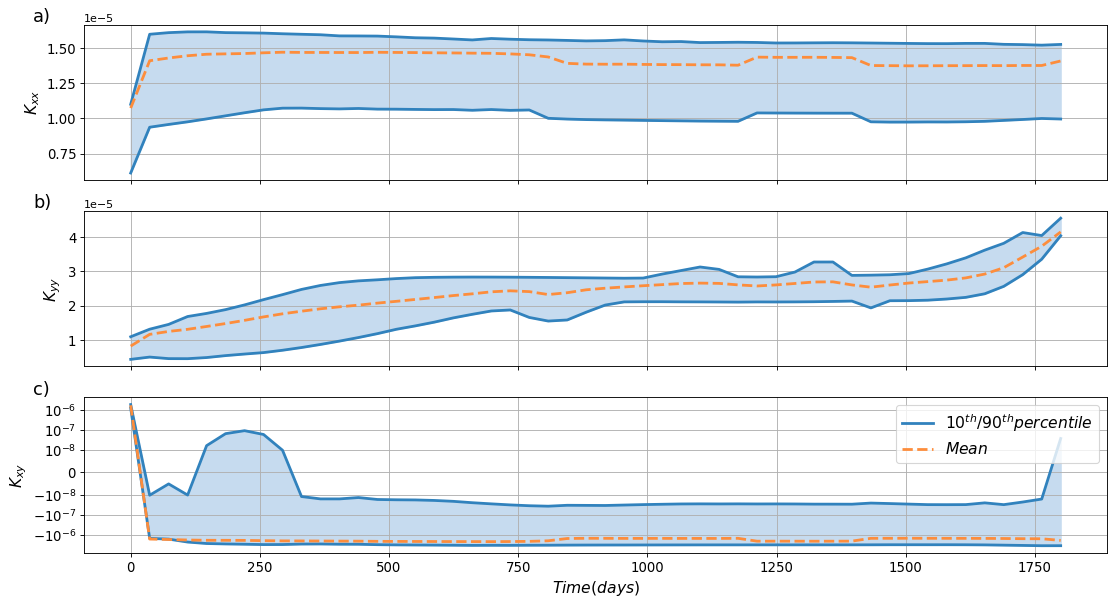

In [63]:
my_dpi = 80
fig, axs = plt.subplots(3, 1, figsize=(1100/my_dpi, 600/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)

ax1 = plt.subplot(311)
plot_k(t,k_x,p,epoch)
plt.yscale('linear')
plt.tick_params(axis='y',which='both', labelsize=12)
plt.grid()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.text(-0.05, 1.02, 'a)', transform=ax1.transAxes,size=16)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel(r'$K_{xx}$', fontsize= 14)


ax2 = plt.subplot(312)
plot_k(t,k_y,p,epoch)
plt.yscale('linear')
plt.tick_params(axis='y',which='both', labelsize=12)
plt.grid()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax2.text(-0.05, 1.02, 'b)', transform=ax2.transAxes,size=16)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.ylabel(r'$K_{yy}$', fontsize= 14)


ax3 = plt.subplot(313)
plot_k(t,k_xy,p,epoch)
plt.yscale('symlog', linthreshy=1e-8)
plt.tick_params(axis='y',which='both', labelsize=12)
plt.tick_params(axis='x',which='both', labelsize=12)
plt.legend(loc=1, fontsize= 14)
plt.grid()
ax3.text(-0.05, 1.02, 'c)', transform=ax3.transAxes,size=16)
plt.ylabel(r'$K_{xy}$', fontsize= 14)

plt.xlabel(r'$Time (days)$', fontsize= 14)

plt.savefig('./../../../plots/2d_k_evo_paper.pdf', bbox_inches='tight',dpi=my_dpi)


In [57]:
p[200,:]

IndexError: index 200 is out of bounds for axis 0 with size 141